IMPORTING ALL THE NECESSAY LIBRARIES

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from collections import Counter

# IMPORTING DATASET (CIFAR-10)

In [ ]:
from keras.datasets import cifar10
(x_train_copy, y_train_copy), (x_test_copy, y_test_copy) = cifar10.load_data()
print('x_train shape:', x_train_copy.shape)
print('y_train shape:', y_train_copy.shape)
print(x_train_copy.shape[0], 'train samples')
print(x_test_copy.shape[0], 'test samples')


170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


# ADJUSTING NUMBER OF INPUT/OUTPUT TO USE

In [ ]:
train_ex=1000
test_ex=200

In [ ]:
x_train=x_train_copy[:train_ex]
x_test=x_test_copy[:test_ex]

In [ ]:
y_train=y_train_copy[:train_ex]
y_test=y_test_copy[:test_ex]

# TRAIN DATA

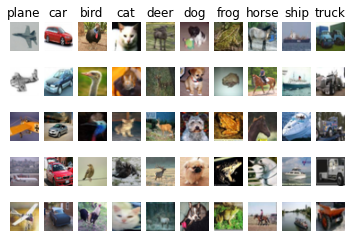

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# TEST DATA

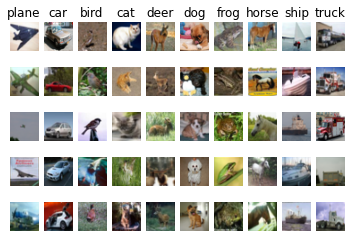

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_test == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# DATA PREPROCESSING

1. Reshaping the dataset from 3-D matrix to 1-D vector.
2. Standardizing the dataset

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
print(x_train.shape, x_test.shape)

(4000, 3072) (800, 3072)


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train

array([[0.00090734, 0.00095348, 0.00096886, ..., 0.00189158, 0.00141484,
        0.00110727],
       [0.00236832, 0.00272203, 0.00287582, ..., 0.00219915, 0.00204537,
        0.00221453],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.0012303 , 0.00132257,
        0.00129181],
       ...,
       [0.00252211, 0.00230681, 0.00195309, ..., 0.00247597, 0.00212226,
        0.00158401],
       [0.00350634, 0.00362937, 0.00369089, ..., 0.00141484, 0.00161476,
        0.00173779],
       [0.00138408, 0.00167628, 0.0013687 , ..., 0.00127643, 0.00235294,
        0.00087659]])

# KNN FROM SCRATCH (ALGORITHM)

EUCLIDEAN DISTANCE OF A TEST POINT FROM ALL TRAIN POINT

In [ ]:
def euclidean_distance(train,test):

    diff=test-train
    dist=np.sqrt(np.sum(diff**2))    
    return dist

In [ ]:
def knn_from_scratch(x_test, x_train, y_train,k):

    y_hat=[]
    for test in x_test:
        distances=[]
        for train in x_train:

            dist=euclidean_distance(train,test)
            distances.append(dist)


        y_train=y_train.reshape(y_train.shape[0],)
        data={
            'Distances':distances,
            'class':y_train
        }

        df_distance=pd.DataFrame(data)
        df_k_distance=df_distance.sort_values(by=['Distances'],axis=0)[:k]
        counter = Counter(y_train[df_k_distance.index])
        prediction=counter.most_common()[0][0]

        y_hat.append(prediction)
        
    return y_hat

# IMPLEMENTATION PART 
**USING K-FOLD CROSS VALIDATION**

In [ ]:
from sklearn.metrics import accuracy_score

possible_k=[1,3,5,7,9,11,13,15,17,19,21]
y_hat=[]
accuracies=[]

#for k-fold cross-validation
#----------------------------------#
num_folds=5

x_train_folds=np.array_split(x_train,num_folds)
y_train_folds=np.array_split(y_train,num_folds)

#----------------------------------#


for k in possible_k:
    avg_accuracy=0
    for i in range(num_folds):
        
        x_val=x_train_folds[i]
        y_val=y_train_folds[i]
        x_train=x_train_folds
        y_train=y_train_folds
        
        temp = np.delete(x_train,i,0)
        x_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,i,0)
        y_train = np.concatenate((y_train),axis = 0)
        
        y_hat= knn_from_scratch(x_val,x_train,y_train,k)
        
        avg_accuracy+=accuracy_score(y_val, y_hat)/num_folds
        
    accuracies.append(avg_accuracy)

# VAL ACCURACY v/s K (GRAPH)

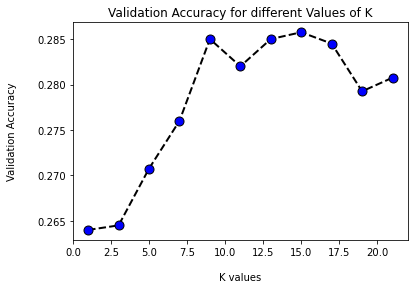

In [ ]:
plt.plot(possible_k, accuracies,color='black', linestyle='dashed', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=9) 

plt.xlabel('K values',labelpad=15)
plt.ylabel('Validation Accuracy',labelpad=20)
plt.title('Validation Accuracy for different Values of K')
plt.show()

# BEST K AND TEST ACCURACY

In [ ]:
best_k=15
y_hat_test=knn_from_scratch(x_test,x_train,y_train,best_k)
print(accuracy_score(y_test, y_hat_test))

0.27875


# TEST ERROR

In [ ]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error

print(" TEST Mean Absolute Error= ", mean_absolute_error(y_test, y_hat_test)) 
print("\n TEST Mean Squared Error= ", mean_squared_error(y_test, y_hat_test))

 TEST Mean Absolute Error=  115.415

 TEST Mean Squared Error=  12.1225


# CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
print("\n",confusion_matrix(y_test,y_hat_test))


 [[31  0 10  0 10  0  2  0 25  2]
 [ 4  0 10  2 17  1 12  0 17  3]
 [14  0 42  0 12  3  5  0  5  0]
 [ 3  0 30  7 15  5 15  0  2  1]
 [ 3  0 24  1 28  0  6  0  9  0]
 [ 8  0 18  1 25  8 11  0  4  0]
 [ 1  0 35  2 26  0 29  0  2  0]
 [ 5  0 22  3 27  2  7  4  6  2]
 [ 8  0  4  1  7  2  0  1 60  1]
 [10  1 15  1 11  2  5  3 30 14]]


# **PRECISION v/s RECALL**

CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report

print("\n",classification_report(y_test, y_hat_test))


               precision    recall  f1-score   support

           0       0.36      0.39      0.37        80
           1       0.00      0.00      0.00        66
           2       0.20      0.52      0.29        81
           3       0.39      0.09      0.15        78
           4       0.16      0.39      0.22        71
           5       0.35      0.11      0.16        75
           6       0.32      0.31      0.31        95
           7       0.50      0.05      0.09        78
           8       0.38      0.71      0.49        84
           9       0.61      0.15      0.24        92

    accuracy                           0.28       800
   macro avg       0.32      0.27      0.23       800
weighted avg       0.34      0.28      0.24       800



**PRECISION AND RECALL CURVE FOR EACH CLASS**

In [ ]:
from sklearn.preprocessing import label_binarize

y_test= label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
y_hat_test= label_binarize(y_hat_test, classes=[0,1,2,3,4,5,6,7,8,9])

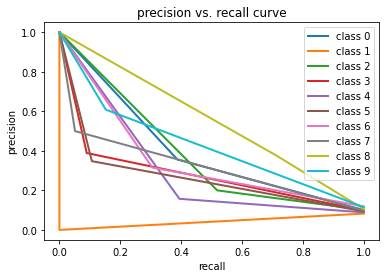

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_hat_test[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()